In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_excel('../csv_files/raw_data_dhkhdl15a.xlsx')
df

,STT,Mã sinh viên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,Giáo dục thể chất 1,Nhập môn Lập trình,...,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp,Thực tập doanh nghiệp,Học lực,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Hạnh kiểm,Unnamed: 90
0,NaN,NaN,NaN,NaN,5.0,2.0,4.0,2.0,2.0,2.0,...,0.0,5.0,5.0,Số tín chỉ,Điểm 10,Điểm 4,Điểm chữ,Xếp loại,Điểm,Xếp loại
1,1.0,19489471.0,Đinh Tuấn,Anh,5.1,8.3,7.0,8.5,6.5,7.3,...,NaN,NaN,NaN,29,5.90,2.21,C,Trung bình,0,NaN
2,2.0,19442001.0,Hà Bảo,Anh,5.3,6.1,7.5,7.1,7.5,8.0,...,NaN,NaN,NaN,18,4.90,1.90,D,Trung bình yếu,0,NaN
3,3.0,19478881.0,Lưu Đức,Anh,5.6,7.7,7.0,8.4,6.5,6.8,...,NaN,NaN,NaN,21,5.90,2.26,C,Trung bình,0,NaN
4,4.0,19506751.0,Trần Nam,Bá,6.7,7.5,6.5,8.6,6.5,7.8,...,NaN,NaN,NaN,21,6.40,2.63,C+,Khá,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56.0,19446701.0,Huỳnh Anh,Tú,6.4,6.3,6.5,7.7,7.0,6.7,...,NaN,NaN,NaN,25,6.30,2.28,C+,Trung bình,0,NaN
57,57.0,19497581.0,Nguyễn Văn Anh,Tuấn,5.6,7.5,7.0,6.0,6.5,9.7,...,NaN,NaN,NaN,25,7.20,2.80,B,Khá,0,NaN
58,58.0,19469421.0,Phạm Minh,Tuấn,6.3,6.4,6.5,7.0,5.5,4.7,...,NaN,NaN,NaN,21,5.70,2.18,C,Trung bình,0,NaN
59,59.0,19512321.0,Phan Lê Hoàng,Việt,1.0,7.6,6.5,5.7,5.0,9.0,...,NaN,NaN,NaN,17,5.30,2.06,D+,Trung bình,0,NaN


In [3]:
# Loại bỏ dấu cách
df = df.rename(columns={i : i.strip() for i in df.columns})

# Làm tròn mã số sv
df.loc[1:, 'Mã sinh viên'] = df.loc[1:, 'Mã sinh viên'].astype('int64')

# Xóa cột Unamed 90
df.drop('Unnamed: 90', axis=1, inplace=True)

# Cột Hạnh kiểm chỉ có số 0, nên xóa đi
df.drop('Hạnh kiểm', axis=1, inplace=True)

In [4]:
hk1_nam1 = [
    'Những nguyên lý cơ bản của Chủ nghĩa Mác – Lênin',
    'Nhập môn Tin học',
    'Toán cao cấp 1',
    'Nhập môn Lập trình'
]

hk2_nam1 = [
    'Kỹ thuật lập trình',
    'Hệ thống Máy tính',
    'Kỹ năng làm việc nhóm',
    'Toán cao cấp 2',
    'Toán ứng dụng',
    'Hàm phức và phép biến đổi Laplace',
    'Phương pháp tính',
    'Vật lý đại cương',
    'Logic học'
]

hk1_nam2 = [
    'Cấu trúc rời rạc',
    'Cấu trúc dữ liệu và giải thuật',
    'Hệ cơ sở dữ liệu',
    'Lập trình hướng đối tượng',
    'Xác suất trong Khoa học Dữ liệu',
    'Giải thuật và tối ưu hóa phân tán',
    'Trực quan hóa dữ liệu',
    'Đại số tuyến tính tính toán'
]

hk2_nam2 = [
    'Mạng máy tính',
    'Pháp luật đại cương',
    'Phương pháp luận nghiên cứu khoa học',
    'Thống kê máy tính và ứng dụng',
    'Nhập môn Khoa học Dữ liệu',
    'Lập trình phân tích dữ liệu',
    'Quá trình ngẫu nhiên',
    'Các ngôn ngữ truy vấn cơ sở dữ liệu',
    'Kiến trúc hướng dịch vụ và Điện toán đám mây',
    'Giao tiếp kinh doanh',
    'Kỹ năng xây dựng kế hoạch',
    'Quản trị doanh nghiệp',
    'Môi trường và con người',
    'Quản trị học',
    'Kế toán cơ bản'
]

so_tin_chi = df.loc[0].to_list()
mon_hoc = df.columns[4:-7].to_list()
outlier = ['Giáo dục Quốc phòng và An ninh 1', 'Giáo dục thể chất 1', 'Tiếng anh 1', 'Giáo dục thể chất 2',
       'Giáo dục quốc phòng và an ninh 2', 'Tiếng anh 2']
df = df.rename(columns={'Học lực': 'Số tín chỉ', 'Unnamed: 85' : 'Điểm 10', 'Unnamed: 86': 'Điểm 4', 'Unnamed: 87' : 'Điểm chữ', 'Unnamed: 88': 'Xếp loại'})

In [5]:
diem_xeploai = {
    (9, 10) : ['A+', 'Xuất sắc'],
    (8.5, 8.9) : ['A', 'Giỏi'],
    (8, 8.4) : ['B+', 'Khá'],
    (7, 7.9) : ['B', 'Khá'],
    (6, 6.9) : ['C+', 'Trung bình'],
    (5.5, 5.9) : ['C', 'Trung bình'],
    (5, 5.4) : ['D+', 'Trung bình yếu'],
    (4, 4.9) : ['D', 'Trung bình yếu'],
    (0, 3.9) : ['F', 'Kém']
}

diem_he4 = {
    'A+': 4, 'A': 3.8,
    'B+': 3.5, 'B': 3,
    'C+': 2.5, 'C': 2,
    'D+': 1.5, 'D': 1,
    'F': 0
}

subjects = list(df.columns[4:-6])

In [6]:
subjects

['Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin',
 'Nhập môn Tin học',
 'Giáo dục Quốc phòng và An ninh 1',
 'Toán cao cấp 1',
 'Giáo dục thể chất 1',
 'Nhập môn Lập trình',
 'Kỹ thuật lập trình',
 'Hệ thống Máy tính',
 'Tiếng anh 1',
 'Kỹ năng làm việc nhóm',
 'Giao tiếp kinh doanh',
 'Kỹ năng xây dựng kế hoạch',
 'Quản trị doanh nghiệp',
 'Môi trường và con người',
 'Quản trị học',
 'Kế toán cơ bản',
 'Toán cao cấp 2',
 'Giáo dục thể chất 2',
 'Giáo dục quốc phòng và an ninh 2',
 'Cấu trúc rời rạc',
 'Cấu trúc dữ liệu và giải thuật',
 'Hệ cơ sở dữ liệu',
 'Tiếng anh 2',
 'Lập trình hướng đối tượng',
 'Xác suất trong Khoa học Dữ liệu',
 'Giải thuật và tối ưu hóa phân tán',
 'Trực quan hóa dữ liệu',
 'Đại số tuyến tính tính toán',
 'Mạng máy tính',
 'Pháp luật đại cương',
 'Toán ứng dụng',
 'Phương pháp luận nghiên cứu khoa học',
 'Hàm phức và phép biến đổi Laplace',
 'Phương pháp tính',
 'Vật lý đại cương',
 'Logic học',
 'Thống kê máy tính và ứng dụng',
 'Nhập môn Khoa học Dữ liệu

In [7]:
def get_xeploai(diem):
    for i in diem_xeploai.items():
        if (i[0][0] <= diem <= i[0][1]):
            return i[1]
    ok = ['NO']
    if (diem >= 250):
        ok = ['Tiếng anh 1']
        if (diem >= 350):
            ok = ['Tiếng anh 2']
        ok += ['kk', 'kk']
    return ok

In [8]:
# Tạo một dataframe tín chỉ
tin_chi_mon_hoc = {}
for i in df.loc[[0]].items():
    dat = i[1].values[0]
    if (not type(dat) == str) and (not np.isnan(i[1].values[0])):
        tin_chi_mon_hoc[i[0]] = i[1].values[0]
tin_chi_mon_hoc_df = pd.DataFrame(tin_chi_mon_hoc.items()).T
tin_chi_mon_hoc_df.columns = tin_chi_mon_hoc_df.loc[0]
tin_chi_mon_hoc_df.drop(0, inplace=True)

In [9]:
tin_chi_mon_hoc_df.to_csv('../csv_files/tin_chi.csv')

In [10]:
# xóa hàng 0, do hàng 0 chứa tín chỉ của các môn, mà đã sử dụng rồi nên không cần nữa
df.drop(0, inplace=True)
df.reset_index(inplace=True)

In [11]:
# gán họ và tên vào một cột
for i in range(len(df)):
    df.loc[i, 'Họ và tên'] = ' '.join(df.loc[i, ['Họ đệm', 'Tên']].values)

In [12]:
# Tạo một dict trỏ từ tên đến index của người có tên đó (thường biết đến với biến num trong các hàm trên)
index_of = {}
for i in range(len(df)):
    index_of[df.loc[i, 'Họ và tên']] = i

In [13]:
# tính điểm hệ 10
def cal_10(num, data):
    s = 0
    tin_chi = 0
    for i in data:
        foo = df.loc[num, i]
        if (np.isnan(foo)):
            continue
        dat = tin_chi_mon_hoc_df[i]
        xeploai = get_xeploai(foo)
        if (xeploai[0] == 'NO' or len(xeploai) >= 3):
            continue
        tin_chi += dat.values[0]
        s += foo * dat.values[0]
    if (tin_chi == 0):
        return 0
    return round(s / tin_chi, 1)

In [14]:
# tính điểm hệ 4
# điểm hệ 4 thì tính các điểm mà không phải outlier
def cal_4(num, data):
    s = 0
    tin_chi = 0
    for i in data:
        foo = df.loc[num, i]
        if (np.isnan(foo)):
            continue
        dat = tin_chi_mon_hoc_df[i]
        xeploai = get_xeploai(foo)
        if (xeploai[0] == 'NO' or len(xeploai) >= 3):
            continue
        tin_chi += dat.values[0]
        s += diem_he4[xeploai[0]] * dat.values[0]
    if (tin_chi == 0):
        return 0
    return round(s / tin_chi, 2)

In [15]:
# số tín chỉ của sinh viên có index là num
def so_tin_chi_sv(num, data):
    tin_chi = 0
    for i in df.loc[num, data].items():
        if np.isnan(i[1]):
            continue
        xeploai = get_xeploai(i[1])
        if (xeploai[0] not in ['NO', 'F']):
            flag = True
            if (len(xeploai) >= 3):
                flag = i[0] in xeploai
            tin_chi += tin_chi_mon_hoc_df[i[0]].values[0]
    return int(tin_chi)

In [16]:
s = 0
for i in df.loc[df['Họ và tên'] == 'Nguyễn Văn Anh Tuấn', subjects].items():
    if not np.isnan(i[1].values[0]):
        s += tin_chi_mon_hoc_df[i[0]].values[0]
        print(i[0], tin_chi_mon_hoc_df[i[0]].values[0])

Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin 5.0
Nhập môn Tin học 2.0
Giáo dục Quốc phòng và An ninh 1 4.0
Toán cao cấp 1 2.0
Giáo dục thể chất 1 2.0
Nhập môn Lập trình 2.0
Kỹ thuật lập trình 3.0
Hệ thống Máy tính 4.0
Tiếng anh 1 3.0
Kỹ năng làm việc nhóm 2.0
Toán cao cấp 2 2.0
Giáo dục thể chất 2 2.0
Giáo dục quốc phòng và an ninh 2 4.0
Cấu trúc rời rạc 3.0
Cấu trúc dữ liệu và giải thuật 4.0
Hệ cơ sở dữ liệu 4.0
Tiếng anh 2 3.0
Lập trình hướng đối tượng 3.0
Xác suất trong Khoa học Dữ liệu 2.0
Trực quan hóa dữ liệu 3.0
Logic học 3.0


In [17]:
# số tín chỉ của sinh viên có tên là name
def so_tin_chi_sv2(name):
    tin_chi = 0
    for i in df.loc[df['Họ và tên'] == name, subjects].items():
        if np.isnan(i[1].values[0]):
            continue
        xeploai = get_xeploai(i[1].values[0])
        if (xeploai[0] not in ['NO', 'F']):
            flag = True
            if (len(xeploai) >= 3):
                flag = i[0] in xeploai
            tin_chi += tin_chi_mon_hoc_df[i[0]].values[0]
    return int(tin_chi)

In [18]:
so_tin_chi_sv2('Đoàn Minh Trường')

46

In [19]:
# Lấy ra được danh sách tên người có học bổng
def scholarship(stc, data):
    scholarship_members = []
    for i in range(len(df)):
        if (so_tin_chi_sv(i, data) >= stc and cal_4(i, data) >= 3.2):
            scholarship_members += [' '.join(df.loc[i, ['Họ đệm', 'Tên']].values)]
    return scholarship_members

In [20]:
# Tạo một dic các môn đã học của từng sinh viên
monhoc_cua_sv = {}
for i in range(len(df)):
    name = ' '.join(df.loc[i, ['Họ đệm', 'Tên']])
    monhoc_cua_sv[name] = []  
    for subj in mon_hoc:
        if (np.isnan(df.loc[i, subj]) or subj in outlier):
            continue
        monhoc_cua_sv[name] += [subj]

In [21]:
df.loc[0, 'Họ và tên']

'Đinh Tuấn Anh'

In [22]:
cal_4(0, monhoc_cua_sv['Đinh Tuấn Anh'])

2.49

In [23]:
# Thay đổi điểm 10, 4, điểm chữ và xếp loại cho đúng
for i in range(len(df)):
    df.loc[i, 'Điểm 10'] = cal_10(i, monhoc_cua_sv[df.loc[i, 'Họ và tên']])
    df.loc[i, 'Điểm 4'] = cal_4(i, monhoc_cua_sv[df.loc[i, 'Họ và tên']])
    df.loc[i, ['Điểm chữ', 'Xếp loại']] = get_xeploai(int(df.loc[i, 'Điểm 10']))

In [24]:
hocbong_hk2_nam1 = scholarship(14, hk2_nam1)
hocbong_hk1_nam2 = scholarship(15, hk1_nam2)

In [25]:
import plotly.express as px

scholarship_df = pd.DataFrame({
    'Tên': hocbong_hk2_nam1 + hocbong_hk1_nam2,
    'Năm': ['I'] * len(hocbong_hk2_nam1) + ['II'] * len(hocbong_hk1_nam2),
    'Điểm': [cal_4(i - 1, hk2_nam1) for i in df[df['Họ và tên'].isin(hocbong_hk2_nam1)]['STT'].values] + [cal_4(i - 1, hk1_nam2) for i in df[df['Họ và tên'].isin(hocbong_hk1_nam2)]['STT'].values]
})

fig = px.bar(scholarship_df, x='Tên', y='Điểm', color='Năm')
fig.update_layout(title_text='Biểu đồ thể hiện lượng học bổng của HK2 năm 1 và HK1 năm 2')
fig.show()

In [26]:
import plotly.express as px

data = pd.DataFrame({
    'Họ và tên': [df.loc[i, 'Họ và tên'] for i in range(len(df))],
    'Điểm tích lũy kỳ 3': [round(cal_4(i, hk1_nam2), 2) for i in range(len(df))],
    'Điểm tích lũy 3 kỳ': [round(cal_4(i, monhoc_cua_sv[df.loc[i, 'Họ và tên']]), 2) for i in range(len(df))],
    'Tín chỉ tích lũy': [so_tin_chi_sv(i, monhoc_cua_sv[df.loc[i, 'Họ và tên']] + outlier) for i in range(len(df))]
})

data = data.append({        
    'Họ và tên': 'K15DS', 
    'Điểm tích lũy kỳ 3': round(sum(data['Điểm tích lũy kỳ 3']) / len(data), 2), 
    'Điểm tích lũy 3 kỳ': round(sum(data['Điểm tích lũy 3 kỳ']) / len(data), 2),
    'Tín chỉ tích lũy': sum(data['Tín chỉ tích lũy']) // len(data)
}, ignore_index=True)

fig = px.bar(data, y='Họ và tên', x='Điểm tích lũy kỳ 3', orientation='h')
fig.show()

In [27]:
zscore_df = pd.DataFrame({
    'Họ và tên': df['Họ và tên']
})

In [28]:
# # Mean cột điểm hệ 4 - điểm tích lũy 3 kỳ
# mu = round(df['Điểm 4'].mean(), 2)

# # Std cột điểm hệ 4
# std = round(np.std(df['Điểm 4']), 2)

# # zscore điểm hệ 4
# zscore_diem4 = [round((x - mu) / std, 2) for x in df['Điểm 4']]
# cal_df['zscore_diem4'] = zscore_diem4

In [29]:
# zscore Điểm 4
zscore_df['Điểm 4'] = stats.zscore(list(df['Điểm 4']))

In [30]:
zscore_df[(zscore_df['Điểm 4'] < -2) | (zscore_df['Điểm 4'] > 2)]

,Họ và tên,Điểm 4
6,Đỗ Xuân Đức Chung,-2.136500
24,Nguyễn Thành Nhân,-2.259998
48,Lưu Hoàng Ngọc Trinh,-2.118858
51,Phạm Thành Trung,2.027117


In [31]:
df['Điểm chữ'].to_list().count('C+')

21

In [32]:
[(i, df['Điểm chữ'].to_list().count(i)) for i in df['Điểm chữ'].unique()]

[('C+', 21), ('B', 22), ('D+', 7), ('F', 3), ('D', 3), ('B+', 4)]

In [33]:
df[df['Điểm chữ'] == 'B+']

,index,STT,Mã sinh viên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,Giáo dục thể chất 1,...,Giải tích ngẫu nhiên cho tài chính,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp,Thực tập doanh nghiệp,Số tín chỉ,Điểm 10,Điểm 4,Điểm chữ,Xếp loại,Họ và tên
16,17,17.0,19477071.0,Ngô Quốc,Hoàng,7.1,7.8,7.5,9.8,6.0,...,NaN,NaN,NaN,NaN,27,8.3,3.47,B+,Khá,Ngô Quốc Hoàng
26,27,27.0,19522491.0,Lưu Thị Yến,Nhi,7.0,7.5,7.0,9.5,7.0,...,NaN,NaN,NaN,NaN,22,8.3,3.47,B+,Khá,Lưu Thị Yến Nhi
28,29,29.0,19475611.0,Lê Thanh,Phong,7.0,8.2,7.5,9.5,6.5,...,NaN,NaN,NaN,NaN,21,8,3.31,B+,Khá,Lê Thanh Phong
51,52,52.0,19502701.0,Phạm Thành,Trung,8.0,7.9,7.5,9.9,6.5,...,NaN,NaN,NaN,NaN,25,8.7,3.69,B+,Khá,Phạm Thành Trung


In [34]:
quantile = df['Điểm 4'].quantile([.25, .5, .75])

In [35]:
quantile

0.25    2.1475
0.50     2.565
0.75    2.9625
Name: Điểm 4, dtype: object

In [36]:
# IQR
IQR_diem4 = quantile[.75] - quantile[.25]
IQR_diem4

0.815

In [37]:
# Miền giá trị của điểm 4
df['Điểm 4'].max() - df['Điểm 4'].min()

2.4299999999999997

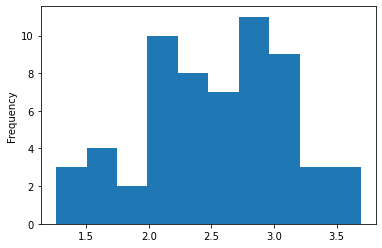

In [38]:
df['Điểm 4'].plot.hist()

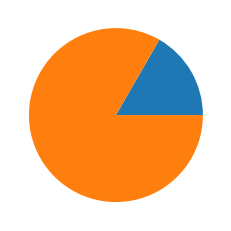

In [39]:
fig, ax = plt.subplots()

ax.pie([16.67, 100 - 16.67])

plt.show()

In [40]:
mon_hoc = 'Toán cao cấp 1'

In [41]:
df[['Họ và tên'] + [mon_hoc]]

,Họ và tên,Toán cao cấp 1
0,Đinh Tuấn Anh,8.5
1,Hà Bảo Anh,7.1
2,Lưu Đức Anh,8.4
3,Trần Nam Bá,8.6
4,Ngô Đức Bảo,9.5
5,Trịnh Thị Bảo Bảo,8.6
6,Đỗ Xuân Đức Chung,5.4
7,Phạm Tài Đức Phú Đa,8.5
8,Lê Tấn Đạt,4.5
9,Phạm Hà Văn Đông,6.7


In [42]:
stats.zscore(df['Điểm 4'].to_list())

array([-0.08997648,  0.75686099, -0.6545348 ,  0.96857036, -0.17818872,
        1.21556462, -2.13650038, -1.06031109, -1.50137227, -0.9897413 ,
       -0.21347361, -0.47811032,  0.73921854,  0.47458183, -0.63689235,
        0.88035812,  1.63898336,  1.10970994, -1.76600898, -0.77803193,
       -0.17818872,  0.17466023,  1.23320707, -0.76038948, -2.25999751,
        0.65100631,  1.63898336, -0.83095927,  1.3567042 ,  0.59807897,
        0.66864875, -0.88388661,  0.10409044,  0.98621281,  0.19230268,
        0.61572141,  0.91564302,  0.45693939,  0.42165449,  0.0158782 ,
        0.61572141, -0.47811032,  0.0158782 ,  0.59807897, -0.24875851,
       -1.53665717,  1.14499483,  0.06880554, -2.11885793, -0.68981969,
       -0.56632256,  2.0271172 ,  0.66864875, -0.38989809, -1.51901472,
       -0.70746214,  0.84507323, -0.97209885, -0.33697074,  1.16263728])

In [43]:
# Tính điểm zscore Toán cao cấp 1
zscore_df['Toán cao cấp 1'] = [round(i, 2) for i in stats.zscore(list(df['Toán cao cấp 1']))]

In [44]:
zscore_df['Điểm 4'] = zscore_df['Điểm 4'].apply(lambda x: round(x, 2))

In [45]:
zscore_df[(zscore_df[mon_hoc] < -2) | (zscore_df[mon_hoc] > 2)]

,Họ và tên,Điểm 4,Toán cao cấp 1
24,Nguyễn Thành Nhân,-2.26,-2.94
54,Đoàn Minh Trường,-1.52,-4.40


Nhận xét điểm:
- có Đoàn Minh Trường là outlier quá lớn so với lớp
- ngoài ra có Nguyễn Thành Nhân

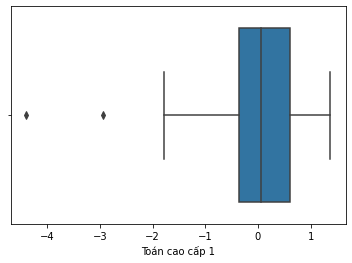

In [46]:
import seaborn as sns
ax = sns.boxplot(x=zscore_df[mon_hoc])

In [47]:
import plotly.express as px
fig = px.box(df, y='Toán cao cấp 1', hover_data={'Họ và tên': True})
fig.show()

In [48]:
df

,index,STT,Mã sinh viên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,Giáo dục thể chất 1,...,Giải tích ngẫu nhiên cho tài chính,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp,Thực tập doanh nghiệp,Số tín chỉ,Điểm 10,Điểm 4,Điểm chữ,Xếp loại,Họ và tên
0,1,1.0,19489471.0,Đinh Tuấn,Anh,5.1,8.3,7.0,8.5,6.5,...,NaN,NaN,NaN,NaN,29,6.6,2.49,C+,Trung bình,Đinh Tuấn Anh
1,2,2.0,19442001.0,Hà Bảo,Anh,5.3,6.1,7.5,7.1,7.5,...,NaN,NaN,NaN,NaN,18,7.4,2.97,B,Khá,Hà Bảo Anh
2,3,3.0,19478881.0,Lưu Đức,Anh,5.6,7.7,7.0,8.4,6.5,...,NaN,NaN,NaN,NaN,21,5.9,2.17,D+,Trung bình yếu,Lưu Đức Anh
3,4,4.0,19506751.0,Trần Nam,Bá,6.7,7.5,6.5,8.6,6.5,...,NaN,NaN,NaN,NaN,21,7.5,3.09,B,Khá,Trần Nam Bá
4,5,5.0,19487461.0,Ngô Đức,Bảo,5.3,7.8,7.5,9.5,5.0,...,NaN,NaN,NaN,NaN,15,6.5,2.44,C+,Trung bình,Ngô Đức Bảo
5,6,6.0,19514491.0,Trịnh Thị Bảo,Bảo,6.2,7.7,8.0,8.6,7.0,...,NaN,NaN,NaN,NaN,18,7.7,3.23,B,Khá,Trịnh Thị Bảo Bảo
6,7,7.0,19498401.0,Đỗ Xuân Đức,Chung,5.4,NaN,7.0,5.4,6.0,...,NaN,NaN,NaN,NaN,16,3.9,1.33,F,Kém,Đỗ Xuân Đức Chung
7,8,8.0,19442481.0,Phạm Tài Đức Phú,Đa,5.3,6.6,7.0,8.5,5.5,...,NaN,NaN,NaN,NaN,25,5.4,1.94,D+,Trung bình yếu,Phạm Tài Đức Phú Đa
8,9,9.0,19463951.0,Lê Tấn,Đạt,5.9,5.9,5.0,4.5,5.0,...,NaN,NaN,NaN,NaN,19,4.9,1.69,D,Trung bình yếu,Lê Tấn Đạt
9,10,10.0,19500311.0,Phạm Hà Văn,Đông,5.0,NaN,7.0,6.7,5.5,...,NaN,NaN,NaN,NaN,20,5.7,1.98,D+,Trung bình yếu,Phạm Hà Văn Đông


In [49]:
df.loc[50, ['Họ và tên', 'Kỹ thuật lập trình']]

Họ và tên             Nguyễn Tuấn Trung
Kỹ thuật lập trình                  8.5
Name: 50, dtype: object

In [50]:
df.loc[:, ['Họ và tên', 'Cấu trúc dữ liệu và giải thuật']]

,Họ và tên,Cấu trúc dữ liệu và giải thuật
0,Đinh Tuấn Anh,6.1
1,Hà Bảo Anh,7.2
2,Lưu Đức Anh,5.7
3,Trần Nam Bá,7.1
4,Ngô Đức Bảo,NaN
5,Trịnh Thị Bảo Bảo,7.2
6,Đỗ Xuân Đức Chung,NaN
7,Phạm Tài Đức Phú Đa,4.3
8,Lê Tấn Đạt,NaN
9,Phạm Hà Văn Đông,5.2


In [51]:
df

,index,STT,Mã sinh viên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,Giáo dục thể chất 1,...,Giải tích ngẫu nhiên cho tài chính,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp,Thực tập doanh nghiệp,Số tín chỉ,Điểm 10,Điểm 4,Điểm chữ,Xếp loại,Họ và tên
0,1,1.0,19489471.0,Đinh Tuấn,Anh,5.1,8.3,7.0,8.5,6.5,...,NaN,NaN,NaN,NaN,29,6.6,2.49,C+,Trung bình,Đinh Tuấn Anh
1,2,2.0,19442001.0,Hà Bảo,Anh,5.3,6.1,7.5,7.1,7.5,...,NaN,NaN,NaN,NaN,18,7.4,2.97,B,Khá,Hà Bảo Anh
2,3,3.0,19478881.0,Lưu Đức,Anh,5.6,7.7,7.0,8.4,6.5,...,NaN,NaN,NaN,NaN,21,5.9,2.17,D+,Trung bình yếu,Lưu Đức Anh
3,4,4.0,19506751.0,Trần Nam,Bá,6.7,7.5,6.5,8.6,6.5,...,NaN,NaN,NaN,NaN,21,7.5,3.09,B,Khá,Trần Nam Bá
4,5,5.0,19487461.0,Ngô Đức,Bảo,5.3,7.8,7.5,9.5,5.0,...,NaN,NaN,NaN,NaN,15,6.5,2.44,C+,Trung bình,Ngô Đức Bảo
5,6,6.0,19514491.0,Trịnh Thị Bảo,Bảo,6.2,7.7,8.0,8.6,7.0,...,NaN,NaN,NaN,NaN,18,7.7,3.23,B,Khá,Trịnh Thị Bảo Bảo
6,7,7.0,19498401.0,Đỗ Xuân Đức,Chung,5.4,NaN,7.0,5.4,6.0,...,NaN,NaN,NaN,NaN,16,3.9,1.33,F,Kém,Đỗ Xuân Đức Chung
7,8,8.0,19442481.0,Phạm Tài Đức Phú,Đa,5.3,6.6,7.0,8.5,5.5,...,NaN,NaN,NaN,NaN,25,5.4,1.94,D+,Trung bình yếu,Phạm Tài Đức Phú Đa
8,9,9.0,19463951.0,Lê Tấn,Đạt,5.9,5.9,5.0,4.5,5.0,...,NaN,NaN,NaN,NaN,19,4.9,1.69,D,Trung bình yếu,Lê Tấn Đạt
9,10,10.0,19500311.0,Phạm Hà Văn,Đông,5.0,NaN,7.0,6.7,5.5,...,NaN,NaN,NaN,NaN,20,5.7,1.98,D+,Trung bình yếu,Phạm Hà Văn Đông


In [52]:
def make_boxplot(subject):
    fig = px.box(df, y=subject, hover_data={'Họ và tên': True})
    fig.show()

In [53]:
fig = px.box(df, y='Toán cao cấp 1', hover_data={'Họ và tên': True})
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["y", 'Cấu trúc dữ liệu và giải thuật'],
                    label="Cấu trúc dữ liệu và giải thuật",
                    method="restyle"
                ),
                dict(
                    args=["y", 'Toán cao cấp 1'],
                    label="Toán cao cấp 1",
                    method="restyle"
                )
            ])
        ),
    ]
)


- Vẽ boxplot cho từng môn, làm dropdown

In [54]:
make_boxplot('Kỹ thuật lập trình')

In [55]:
# import plotly.graph_objects as go

# import pandas as pd

# # load dataset
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# # create figure
# fig = go.Figure()

# # Add surface trace
# fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# # Update plot sizing
# fig.update_layout(
#     width=800,
#     height=900,
#     autosize=False,
#     margin=dict(t=0, b=0, l=0, r=0),
#     template="plotly_white",
# )

# # Update 3D scene options
# fig.update_scenes(
#     aspectratio=dict(x=1, y=1, z=0.7),
#     aspectmode="manual"
# )

# # Add dropdown
# fig.update_layout(
#     updatemenus=[
#         dict(
#             buttons=list([
#                 dict(
#                     args=["type", "surface"],
#                     label="3D Surface",
#                     method="restyle"
#                 ),
#                 dict(
#                     args=["type", "heatmap"],
#                     label="Heatmap",
#                     method="restyle"
#                 )
#             ]),
#             direction="down",
#             pad={"r": 10, "t": 10},
#             showactive=True,
#             x=0.1,
#             xanchor="left",
#             y=1.1,
#             yanchor="top"
#         ),
#     ]
# )

# # Add annotation
# fig.update_layout(
#     annotations=[
#         dict(text="Trace type:", showarrow=False,
#         x=0, y=1.085, yref="paper", align="left")
#     ]
# )

# fig.show()

In [56]:
df

,index,STT,Mã sinh viên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,Giáo dục thể chất 1,...,Giải tích ngẫu nhiên cho tài chính,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp,Thực tập doanh nghiệp,Số tín chỉ,Điểm 10,Điểm 4,Điểm chữ,Xếp loại,Họ và tên
0,1,1.0,19489471.0,Đinh Tuấn,Anh,5.1,8.3,7.0,8.5,6.5,...,NaN,NaN,NaN,NaN,29,6.6,2.49,C+,Trung bình,Đinh Tuấn Anh
1,2,2.0,19442001.0,Hà Bảo,Anh,5.3,6.1,7.5,7.1,7.5,...,NaN,NaN,NaN,NaN,18,7.4,2.97,B,Khá,Hà Bảo Anh
2,3,3.0,19478881.0,Lưu Đức,Anh,5.6,7.7,7.0,8.4,6.5,...,NaN,NaN,NaN,NaN,21,5.9,2.17,D+,Trung bình yếu,Lưu Đức Anh
3,4,4.0,19506751.0,Trần Nam,Bá,6.7,7.5,6.5,8.6,6.5,...,NaN,NaN,NaN,NaN,21,7.5,3.09,B,Khá,Trần Nam Bá
4,5,5.0,19487461.0,Ngô Đức,Bảo,5.3,7.8,7.5,9.5,5.0,...,NaN,NaN,NaN,NaN,15,6.5,2.44,C+,Trung bình,Ngô Đức Bảo
5,6,6.0,19514491.0,Trịnh Thị Bảo,Bảo,6.2,7.7,8.0,8.6,7.0,...,NaN,NaN,NaN,NaN,18,7.7,3.23,B,Khá,Trịnh Thị Bảo Bảo
6,7,7.0,19498401.0,Đỗ Xuân Đức,Chung,5.4,NaN,7.0,5.4,6.0,...,NaN,NaN,NaN,NaN,16,3.9,1.33,F,Kém,Đỗ Xuân Đức Chung
7,8,8.0,19442481.0,Phạm Tài Đức Phú,Đa,5.3,6.6,7.0,8.5,5.5,...,NaN,NaN,NaN,NaN,25,5.4,1.94,D+,Trung bình yếu,Phạm Tài Đức Phú Đa
8,9,9.0,19463951.0,Lê Tấn,Đạt,5.9,5.9,5.0,4.5,5.0,...,NaN,NaN,NaN,NaN,19,4.9,1.69,D,Trung bình yếu,Lê Tấn Đạt
9,10,10.0,19500311.0,Phạm Hà Văn,Đông,5.0,NaN,7.0,6.7,5.5,...,NaN,NaN,NaN,NaN,20,5.7,1.98,D+,Trung bình yếu,Phạm Hà Văn Đông


In [57]:
df.loc[df['Cấu trúc dữ liệu và giải thuật'] >= 8, ['Họ và tên', 'Cấu trúc dữ liệu và giải thuật']]

,Họ và tên,Cấu trúc dữ liệu và giải thuật
16,Ngô Quốc Hoàng,8.4
22,Trương Thị Cẩm Ly,8.5
26,Lưu Thị Yến Nhi,9.5
36,Văn Sỹ,8.0
43,Trần Xuân Thủy,8.2
46,Huỳnh Minh Toàn,8.2
51,Phạm Thành Trung,8.9
52,Phan Chí Trung,8.2
54,Đoàn Minh Trường,9.1
56,Nguyễn Văn Anh Tuấn,8.9


In [58]:
make_boxplot('Cấu trúc dữ liệu và giải thuật')

In [59]:
df.loc[0, 'Thị giác máy tính']

nan

In [60]:
np.nan

nan

In [61]:
xeploai_df = pd.DataFrame(columns=['STT', 'Mã sinh viên', 'Họ và tên', 'Họ đệm', 'Tên'] + subjects)
for i in range(len(df)):
    sv_info = []
    for name in list(xeploai_df.columns):
        need = nan
        if (name in subjects and np.isnan(df.loc[i, name])):
            need = nan
        else:
            need = get_xeploai(df.loc[i, name])[0] if name in subjects and df.loc[i, name] <= 10 else df.loc[i, name]
        sv_info += [need]
    xeploai_df = pd.concat([xeploai_df, pd.DataFrame([sv_info], columns=list(xeploai_df.columns))], ignore_index=True)

In [62]:
subjects

['Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin',
 'Nhập môn Tin học',
 'Giáo dục Quốc phòng và An ninh 1',
 'Toán cao cấp 1',
 'Giáo dục thể chất 1',
 'Nhập môn Lập trình',
 'Kỹ thuật lập trình',
 'Hệ thống Máy tính',
 'Tiếng anh 1',
 'Kỹ năng làm việc nhóm',
 'Giao tiếp kinh doanh',
 'Kỹ năng xây dựng kế hoạch',
 'Quản trị doanh nghiệp',
 'Môi trường và con người',
 'Quản trị học',
 'Kế toán cơ bản',
 'Toán cao cấp 2',
 'Giáo dục thể chất 2',
 'Giáo dục quốc phòng và an ninh 2',
 'Cấu trúc rời rạc',
 'Cấu trúc dữ liệu và giải thuật',
 'Hệ cơ sở dữ liệu',
 'Tiếng anh 2',
 'Lập trình hướng đối tượng',
 'Xác suất trong Khoa học Dữ liệu',
 'Giải thuật và tối ưu hóa phân tán',
 'Trực quan hóa dữ liệu',
 'Đại số tuyến tính tính toán',
 'Mạng máy tính',
 'Pháp luật đại cương',
 'Toán ứng dụng',
 'Phương pháp luận nghiên cứu khoa học',
 'Hàm phức và phép biến đổi Laplace',
 'Phương pháp tính',
 'Vật lý đại cương',
 'Logic học',
 'Thống kê máy tính và ứng dụng',
 'Nhập môn Khoa học Dữ liệu

In [63]:
xeploai_df

,STT,Mã sinh viên,Họ và tên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,Giáo dục thể chất 1,...,Tâm lý học đại cương,Đảm bảo chất lượng và Kiểm thử phần mềm,Học sâu,Tiếng Việt thực hành,Thị giác máy tính,Phân tích dữ liệu Bayesian,Phân tích kinh doanh,Giải tích ngẫu nhiên cho tài chính,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp
0,1.0,19489471.0,Đinh Tuấn Anh,Đinh Tuấn,Anh,D+,B+,B,A,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,19442001.0,Hà Bảo Anh,Hà Bảo,Anh,D+,C+,B,B,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,19478881.0,Lưu Đức Anh,Lưu Đức,Anh,C,B,B,B+,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,19506751.0,Trần Nam Bá,Trần Nam,Bá,C+,B,C+,A,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,19487461.0,Ngô Đức Bảo,Ngô Đức,Bảo,D+,B,B,A+,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,19514491.0,Trịnh Thị Bảo Bảo,Trịnh Thị Bảo,Bảo,C+,B,B+,A,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,19498401.0,Đỗ Xuân Đức Chung,Đỗ Xuân Đức,Chung,D+,NaN,B,D+,C+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,19442481.0,Phạm Tài Đức Phú Đa,Phạm Tài Đức Phú,Đa,D+,C+,B,A,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,19463951.0,Lê Tấn Đạt,Lê Tấn,Đạt,C,C,D+,D,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,19500311.0,Phạm Hà Văn Đông,Phạm Hà Văn,Đông,D+,NaN,B,C+,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
xeploai_df.to_csv('../csv_files/xeploai.csv')

In [65]:
from collections import Counter

In [66]:
# -1 if o1 < o2
# 1 if o1 > o2
# 0 if o1 == o2
def compare(o1, o2):
    o1 = o1[0]
    o2 = o2[0]
    if (o1[0] == o2[0]):
        return [1, -1][len(o1) == 2]
    return [1, -1][o1[0] < o2[0]]

In [67]:
def comp(o1):
    print(o1)
    return -1

In [68]:
from functools import cmp_to_key

In [69]:
data_score = Counter(xeploai_df['Toán cao cấp 1'])
if np.nan in data_score:
    data_score.pop(np.nan)
data_score = {i[0]: i[1] for i in sorted(data_score.items(), key=cmp_to_key(compare))}

In [70]:
pd.DataFrame({'Xếp loại': data_score.keys(), 'Số lượng': data_score.values()})

,Xếp loại,Số lượng
0,A+,12
1,A,8
2,B+,5
3,B,20
4,C+,8
5,C,3
6,D+,1
7,D,1
8,F,2


In [71]:
import plotly.express as px

data_toancaocap1 = Counter(xeploai_df['Toán cao cấp 1'])
fig = px.bar(x=data_toancaocap1.keys(), y=data_toancaocap1.values())
fig.show()

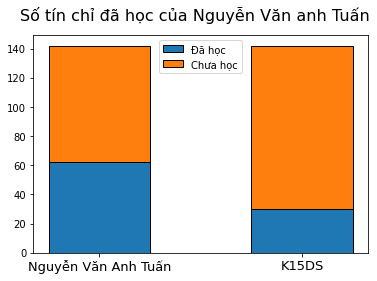

In [72]:
foo = [62, 30]
bar = [142 - 62, 142 - 30]

width = 0.5
ind = np.arange(2)

fig, ax = plt.subplots(figsize=(6, 4))
axis = []

axis.append(plt.bar(ind, foo, width, label='Đã học', edgecolor='black'))
axis.append(plt.bar(ind, bar, width, bottom=foo, label='Chưa học', edgecolor='black'))

plt.xticks(ind, ['Nguyễn Văn Anh Tuấn', 'K15DS'], fontsize=13)
fig.suptitle('Số tín chỉ đã học của Nguyễn Văn anh Tuấn', fontsize=16)
plt.legend(loc='upper center')
plt.show()

In [73]:
so_tin_chi_sv(53, subjects)

65

In [74]:
for i in xeploai_df.loc[xeploai_df['Họ và tên'] == 'Nguyễn Văn Anh Tuấn', subjects].items():
    if (type(i[1].values[0]) in [float, np.float64] and 'Tiếng' not in i[0]):
        print(i[0])

Giao tiếp kinh doanh
Kỹ năng xây dựng kế hoạch
Quản trị doanh nghiệp
Môi trường và con người
Quản trị học
Kế toán cơ bản
Giải thuật và tối ưu hóa phân tán
Đại số tuyến tính tính toán
Mạng máy tính
Pháp luật đại cương
Toán ứng dụng
Phương pháp luận nghiên cứu khoa học
Hàm phức và phép biến đổi Laplace
Phương pháp tính
Vật lý đại cương
Thống kê máy tính và ứng dụng
Nhập môn Khoa học Dữ liệu
Lập trình phân tích dữ liệu
Quá trình ngẫu nhiên
Các ngôn ngữ truy vấn cơ sở dữ liệu
Kiến trúc hướng dịch vụ và Điện toán đám mây
Những vấn đề xã hội và đạo đức nghề nghiệp
Khai thác dữ liệu và ứng dụng
Phát triển ứng dụng
Máy học
Tối ưu hóa cho Khoa học dữ liệu
Phân tích chuỗi thời gian
Kỹ thuật tài chính
Xử lý ảnh
Tư tưởng Hồ Chí Minh
Nhập môn an toàn thông tin
Tương tác người máy
Công nghệ phần mềm
Xử lý ngôn ngữ tự nhiên
Nhập môn dữ liệu lớn
Tiếp thị điện tử
Nhập môn Robot
Giao dịch định lượng
Tính toán song song
Khai phá đồ thị
Hệ khuyến nghị
Lý thuyết trò chơi
Đường lối cách mạng của Đảng Cộng s

In [75]:
df.to_csv('../csv_files/cleaned_data.csv')

In [76]:
df.sort_values(by='Điểm 4', ascending=False).reset_index()

,level_0,index,STT,Mã sinh viên,Họ đệm,Tên,Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin,Nhập môn Tin học,Giáo dục Quốc phòng và An ninh 1,Toán cao cấp 1,...,Giải tích ngẫu nhiên cho tài chính,Chứng chỉ TOEIC 450,Khóa luận tốt nghiệp,Thực tập doanh nghiệp,Số tín chỉ,Điểm 10,Điểm 4,Điểm chữ,Xếp loại,Họ và tên
0,51,52,52.0,19502701.0,Phạm Thành,Trung,8.0,7.9,7.5,9.9,...,NaN,NaN,NaN,NaN,25,8.7,3.69,B+,Khá,Phạm Thành Trung
1,16,17,17.0,19477071.0,Ngô Quốc,Hoàng,7.1,7.8,7.5,9.8,...,NaN,NaN,NaN,NaN,27,8.3,3.47,B+,Khá,Ngô Quốc Hoàng
2,26,27,27.0,19522491.0,Lưu Thị Yến,Nhi,7.0,7.5,7.0,9.5,...,NaN,NaN,NaN,NaN,22,8.3,3.47,B+,Khá,Lưu Thị Yến Nhi
3,28,29,29.0,19475611.0,Lê Thanh,Phong,7.0,8.2,7.5,9.5,...,NaN,NaN,NaN,NaN,21,8,3.31,B+,Khá,Lê Thanh Phong
4,22,23,23.0,19532211.0,Trương Thị Cẩm,Ly,6.3,6.5,8.0,8.4,...,NaN,NaN,NaN,NaN,25,7.9,3.24,B,Khá,Trương Thị Cẩm Ly
5,5,6,6.0,19514491.0,Trịnh Thị Bảo,Bảo,6.2,7.7,8.0,8.6,...,NaN,NaN,NaN,NaN,18,7.7,3.23,B,Khá,Trịnh Thị Bảo Bảo
6,59,60,60.0,19474281.0,Trần Tuấn,Vũ,7.9,6.5,6.5,9.6,...,NaN,NaN,NaN,NaN,22,7.9,3.2,B,Khá,Trần Tuấn Vũ
7,46,47,47.0,19500761.0,Huỳnh Minh,Toàn,6.0,7.9,7.5,8.5,...,NaN,NaN,NaN,NaN,21,7.6,3.19,B,Khá,Huỳnh Minh Toàn
8,17,18,18.0,19443561.0,Hồ Quang,Huy,5.6,8.3,6.5,9.0,...,NaN,NaN,NaN,NaN,25,7.8,3.17,B,Khá,Hồ Quang Huy
9,33,34,34.0,19477821.0,Nguyễn Tuấn,Sinh,7.1,7.2,6.0,7.9,...,NaN,NaN,NaN,NaN,19,7.6,3.1,B,Khá,Nguyễn Tuấn Sinh


In [77]:
df['Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin']

0     5.1
1     5.3
2     5.6
3     6.7
4     5.3
5     6.2
6     5.4
7     5.3
8     5.9
9     5.0
10    5.7
11    5.8
12    6.0
13    6.4
14    5.7
15    4.9
16    7.1
17    5.6
18    5.6
19    6.4
20    5.1
21    6.5
22    6.3
23    5.7
24    4.5
25    6.0
26    7.0
27    5.7
28    7.0
29    8.1
30    6.5
31    5.9
32    5.2
33    7.1
34    5.3
35    5.7
36    4.5
37    4.6
38    6.3
39    5.5
40    6.3
41    2.0
42    5.8
43    4.6
44    1.5
45    5.0
46    6.0
47    4.4
48    5.9
49    7.9
50    4.7
51    8.0
52    6.3
53    5.2
54    4.9
55    6.4
56    5.6
57    6.3
58    1.0
59    7.9
Name: Những nguyên lý cơ bản của Chủ nghĩa Mác - Lênin, dtype: float64